<a href="https://colab.research.google.com/github/RashikaTyagi01/Rashika-UML501/blob/main/mlAssignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.

In [ ]:
#1) part A

In [30]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('/spam.csv',encoding='latin-1')

In [32]:
df = df[["v1", "v2"]]
df.columns = ["label", "message"]

In [33]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})

In [34]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

In [36]:
df["clean_message"] = df["message"].apply(preprocess_text)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_message"])
y = df["label"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [39]:
print("Class distribution:")
print(df["label"].value_counts())


Class distribution:
label
0    4825
1     747
Name: count, dtype: int64


In [ ]:
#1) part B

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

Train accuracy: 0.8837783262284048
test accuracy: 0.8923766816143498


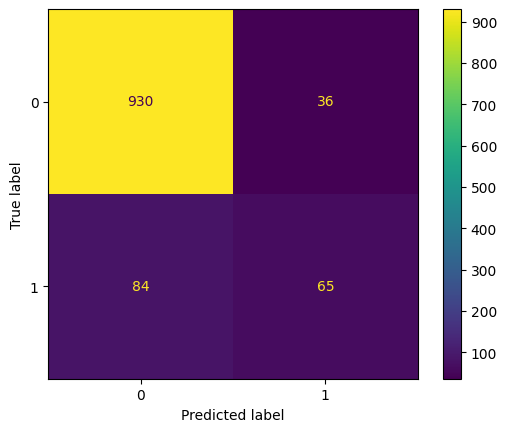

In [41]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
y_train_pred = stump.predict(X_train)
y_test_pred = stump.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train accuracy:",train_acc)
print("test accuracy:",test_acc)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot()
plt.show()



A depth-1 tree uses only one word (one feature) to classify all messages, which is far too weak for complex patterns of spam messages

In [ ]:
#1) part C

In [45]:
T = 15
N = X_train.shape[0]
w = np.ones(N) / N
alphas = []
errors = []
weak_learners = []
y_train_mod = np.where(y_train == 1, 1, -1)
for t in range(1, T + 1):
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(X_train, y_train_mod, sample_weight=w)
    preds = stump.predict(X_train)
    misclassified = preds != y_train_mod
    error_t = np.sum(w[misclassified])
    error_t = max(error_t, 1e-10)
    alpha_t = 0.5 * np.log((1 - error_t) / error_t)
    print(f"\nIteration {t}:")
    print("Misclassified indices:", np.where(misclassified)[0].tolist())
    print("Weights of misclassified samples:", w[misclassified])
    print("Alpha:", alpha_t)
    print("Weighted Error:", error_t)
    alphas.append(alpha_t)
    errors.append(error_t)
    weak_learners.append(stump)
    w = w * np.exp(-alpha_t * y_train_mod * preds)
    w = w / np.sum(w)

train_pred_total = np.zeros(X_train.shape[0])
test_pred_total = np.zeros(X_test.shape[0])
for alpha_t, stump in zip(alphas, weak_learners):
    train_pred_total += alpha_t * stump.predict(X_train)
    test_pred_total += alpha_t * stump.predict(X_test)
train_final = (np.sign(train_pred_total) == 1).astype(int)
test_final = (np.sign(test_pred_total) == 1).astype(int)



Iteration 1:
Misclassified indices: [14, 42, 49, 50, 59, 62, 86, 93, 96, 100, 103, 115, 121, 140, 142, 157, 162, 194, 195, 196, 203, 224, 263, 294, 295, 300, 302, 321, 327, 343, 344, 351, 352, 361, 369, 370, 389, 395, 404, 408, 417, 429, 446, 449, 458, 460, 461, 472, 477, 478, 486, 500, 501, 512, 513, 514, 533, 542, 544, 559, 580, 591, 596, 602, 614, 623, 626, 647, 674, 677, 679, 690, 716, 732, 733, 743, 744, 750, 768, 769, 777, 781, 788, 790, 802, 803, 838, 845, 867, 870, 882, 884, 900, 907, 922, 927, 930, 955, 964, 969, 972, 974, 978, 1010, 1013, 1016, 1036, 1046, 1047, 1067, 1080, 1098, 1100, 1103, 1112, 1114, 1132, 1177, 1179, 1214, 1218, 1223, 1238, 1242, 1246, 1253, 1281, 1292, 1293, 1294, 1297, 1299, 1309, 1314, 1315, 1326, 1329, 1332, 1346, 1357, 1364, 1365, 1374, 1390, 1414, 1435, 1452, 1453, 1455, 1458, 1468, 1469, 1473, 1481, 1482, 1495, 1498, 1512, 1519, 1533, 1541, 1556, 1561, 1570, 1597, 1602, 1613, 1627, 1646, 1650, 1658, 1677, 1683, 1698, 1709, 1710, 1711, 1716, 1725, 

In [46]:
print("Train accuracy:", accuracy_score(y_train, train_final))
print("Test accuracy:", accuracy_score(y_test, test_final))
print(confusion_matrix(y_test, test_final))


Train accuracy: 0.9192281803903971
Test accuracy: 0.9327354260089686
[[964   2]
 [ 73  76]]


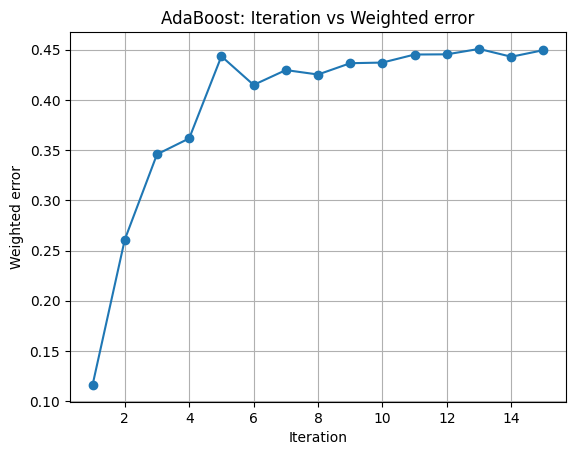

In [47]:
plt.plot(range(1, T+1), errors, marker='o')
plt.title("AdaBoost: Iteration vs Weighted error")
plt.xlabel("Iteration")
plt.ylabel("Weighted error")
plt.grid(True)
plt.show()

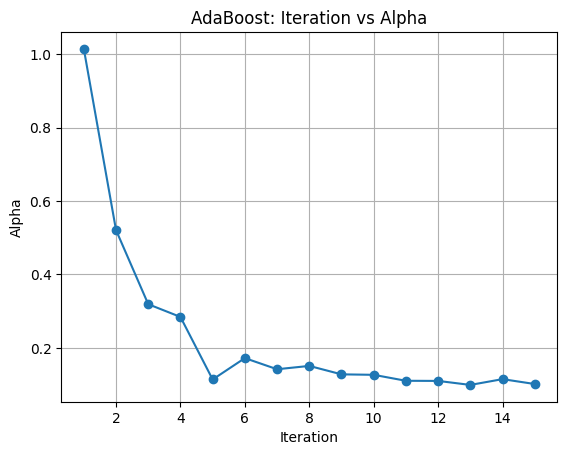

In [44]:
plt.plot(range(1, T+1), alphas, marker='o')
plt.title("AdaBoost: Iteration vs Alpha")
plt.xlabel("Iteration")
plt.ylabel("Alpha")
plt.grid(True)
plt.show()

In [ ]:
#1) part D

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


Train accuracy: 0.9169845187345749
Test accuracy: 0.9246636771300448


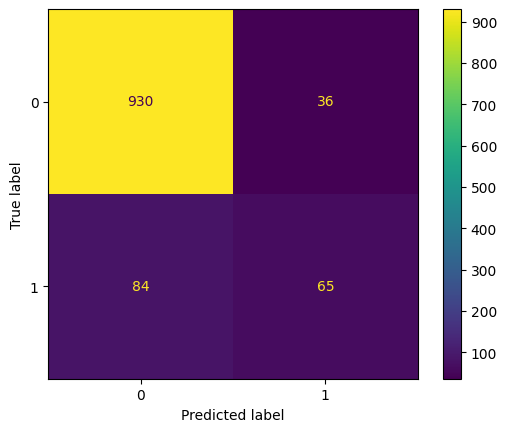

In [51]:
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.6
)
ada_model.fit(X_train, y_train)
train_pred_boost= ada_model.predict(X_train)
test_pred_boost = ada_model.predict(X_test)
train_acc_boost = accuracy_score(y_train, train_pred_boost)
test_acc_boost = accuracy_score(y_test, test_pred_boost)
print("\nTrain accuracy:", train_acc_boost)
print("Test accuracy:", test_acc_boost)
disp= ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot()
plt.show()

Q2.

In [ ]:
#2) part A

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('/heart.csv')
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [57]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X = pd.get_dummies(df.drop('target', axis=1), columns=categorical_cols)
y = df['target']


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
y_train_pred = stump.predict(X_train)
y_test_pred = stump.predict(X_test)
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy :", accuracy_score(y_test, y_test_pred))
print("\nConfusion matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification report (Test Set):\n", classification_report(y_test, y_test_pred))

Training accuracy: 0.756198347107438
Testing accuracy : 0.8032786885245902

Confusion Matrix (Test Set):
 [[25  4]
 [ 8 24]]

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
#2) part B

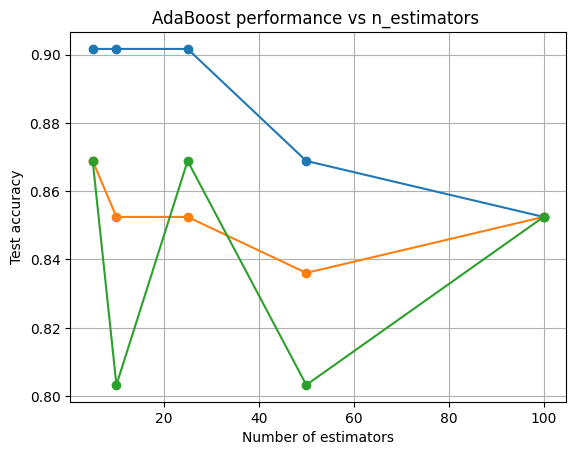

Best accuracy: 0.9016393442622951
Best parameters (n_estimators, learning_rate): (5, 0.1)


In [66]:
n_estimators_list = [5, 10, 25, 50, 100]
learning_rates = [0.1, 0.5, 1.0]
results = {}

for lr in learning_rates:
    acc_list = []
    for n_est in n_estimators_list:
        ada = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
            n_estimators=n_est,
            learning_rate=lr,
            random_state=42
        )
        ada.fit(X_train, y_train)
        y_test_pred = ada.predict(X_test)
        acc = accuracy_score(y_test, y_test_pred)
        acc_list.append(acc)
    results[lr] = acc_list

for lr in learning_rates:
    plt.plot(n_estimators_list, results[lr], marker='o', label=f'learning_rate={lr}')
plt.title("AdaBoost performance vs n_estimators ")
plt.xlabel("Number of estimators")
plt.ylabel("Test accuracy")
plt.grid(True)
plt.show()

best_acc = 0
best_lr = None
best_n = None

for lr in learning_rates:
    for n_est, acc in zip(n_estimators_list, results[lr]):
        if acc > best_acc:
            best_acc = acc
            best_lr = lr
            best_n = n_est

print("Best accuracy:", best_acc)
print("Best parameters (n_estimators, learning_rate):", (best_n, best_lr))



In [99]:
#2) part C

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Final sample weights (first 20):
132    0.003591
202    0.004380
196    0.006016
75     0.003591
176    0.003591
59     0.004857
93     0.004380
6      0.003591
177    0.006016
30     0.004380
22     0.003981
258    0.005425
56     0.003981
242    0.003591
114    0.003591
287    0.004932
282    0.003981
197    0.003591
158    0.005425
164    0.004380
Name: target, dtype: float64


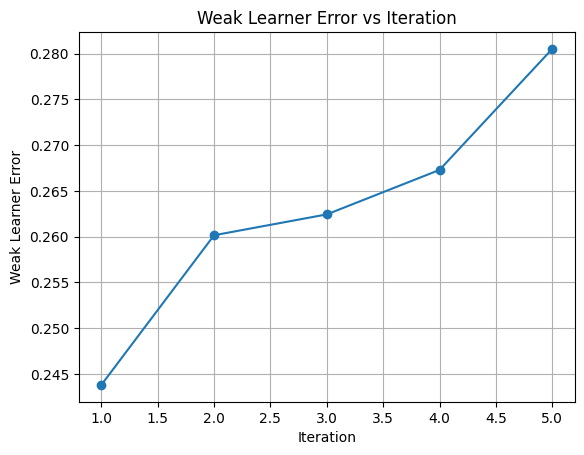

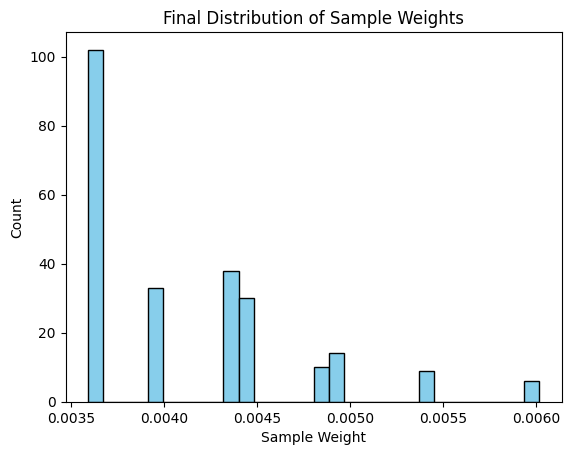

In [71]:
best_lr = 0.1
best_n  = 5
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=best_n,
    learning_rate=best_lr,
    random_state=42
)
ada.fit(X_train, y_train)
weak_errors = ada.estimator_errors_
weak_alphas = ada.estimator_weights_
N = len(y_train)
weights = np.ones(N) / N
for stump, alpha in zip(ada.estimators_, ada.estimator_weights_):
    pred = stump.predict(X_train)
    incorrect = (pred != y_train)
    weights *= np.exp(alpha * incorrect)
    weights /= weights.sum()
final_sample_weights = weights
print("Final sample weights (first 20):")
print(final_sample_weights[:20])
plt.plot(range(1, len(weak_errors)+1), weak_errors, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Weak Learner error")
plt.title("Weak Learner Error vs Iteration")
plt.grid(True)
plt.show()
plt.hist(final_sample_weights, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Sample Weight")
plt.ylabel("Count")
plt.title("Final Distribution of Sample Weights")
plt.show()

In [ ]:
#2) part D

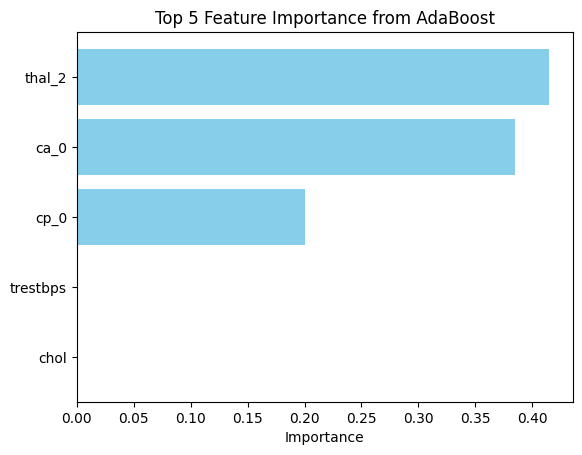

In [74]:
importances = ada.feature_importances_
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
top5 = feat_imp_df.head(5)
plt.barh(top5['feature'], top5['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 5 Feature Importance from AdaBoost")
plt.show()


The top features identified by AdaBoost are likely the most predictive of heart disease.

age: older patients have higher risk

thalach (max heart rate achieved): indicates cardiovascular fitness

chol (serum cholesterol): high cholesterol is a risk factor

oldpeak (ST depression): shows cardiac stress

cp (chest pain type): correlates with heart disease symptoms


Q3.

In [ ]:
#3) part A

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = []
with open("/WISDM_ar_v1.1_raw.txt", "r") as f:
    for line in f:
        line = line.strip()
        if line.endswith(";"):
            line = line[:-1]
        parts = line.split(",")
        if len(parts) != 6:
            continue
        user, activity, timestamp, x, y, z = parts
        try:
            x = float(x)
            y = float(y)
            z = float(z)
        except:
            continue
        data.append([user, activity, timestamp, x, y, z])

df = pd.DataFrame(data, columns=['user','activity','timestamp','x','y','z'])
print("Number of valid rows:", len(df))
vigorous_activities = ['Jogging', 'Upstairs']
df['label'] = df['activity'].apply(lambda x: 1 if x in vigorous_activities else 0)
df = df[['x','y','z','label']]
X = df[['x','y','z']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training class distribution:\n", y_train.value_counts())
print("Testing class distribution:\n", y_test.value_counts())


Number of valid rows: 1086465
Training set shape: (760525, 3)
Testing set shape: (325940, 3)
Training class distribution:
 label
0    439005
1    321520
Name: count, dtype: int64
Testing class distribution:
 label
0    188146
1    137794
Name: count, dtype: int64


In [ ]:
#3) part B

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train_scaled, y_train)
y_train_pred = stump.predict(X_train)
y_test_pred = stump.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("confusion matrix:\n",confusion_matrix(y_test, y_test_pred))
print("\nClassification report:\n", classification_report(y_test, y_test_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Training Accuracy: 0.6306248972749088
Testing Accuracy: 0.6304381174449285
confusion matrix:
 [[179180   8966]
 [111489  26305]]

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.95      0.75    188146
           1       0.75      0.19      0.30    137794

    accuracy                           0.63    325940
   macro avg       0.68      0.57      0.53    325940
weighted avg       0.67      0.63      0.56    325940



In [ ]:
#3) part C

In [94]:
T = 20
n = X_train_scaled.shape[0]
weights = np.ones(n) / n
estimators = []
alphas = []
errors = []
y_train_signed = y_train.replace(0, -1).values
for t in range(T):
    stump = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump.fit(X_train_scaled, y_train, sample_weight=weights)
    pred = stump.predict(X_train_scaled)
    pred_signed = np.where(pred==0, -1, 1)
    incorrect = (pred_signed != y_train_signed)
    error = np.sum(weights * incorrect) / np.sum(weights)
    error = max(error, 1e-10)
    alpha = 0.5 * np.log((1 - error) / error)
    weights *= np.exp(-alpha * y_train_signed * pred_signed)
    weights /= weights.sum()
    estimators.append(stump)
    alphas.append(alpha)
    errors.append(error)
    print(f"Iteration {t+1} | Misclassified (first 10):", np.where(incorrect)[0][:10])
    print("Weights of misclassified (first 5):", weights[incorrect][:5])
    print("Alpha:", alpha, "Error:", error, "\n")

def ada_predict(X):
    total = np.zeros(X.shape[0])
    for est, alpha in zip(estimators, alphas):
        pred = np.where(est.predict(X)==0, -1, 1)
        total += alpha * pred
    return (total > 0).astype(int)
train_pred_boost = ada_predict(X_train_scaled)
test_pred_boost  = ada_predict(X_test_scaled)
print("Train accuracy:", accuracy_score(y_train, train_pred_boost))
print(" Test accuracy:", accuracy_score(y_test, test_pred_boost))
print("\nConfusion matrix:\n", confusion_matrix(y_test, test_pred_boost))

Iteration 1 | Misclassified (first 10): [ 0  2  3  5  6  7  8 12 13 16]
Weights of misclassified (first 5): [1.88988045e-06 1.88988045e-06 1.88988045e-06 1.88988045e-06
 1.88988045e-06]
Alpha: 0.3141983591852141 Error: 0.3478741658722589 

Iteration 2 | Misclassified (first 10): [ 0  1  2  5  6  8 10 12 13 16]
Weights of misclassified (first 5): [2.03256081e-06 1.08426221e-06 2.03256081e-06 2.03256081e-06
 2.03256081e-06]
Alpha: 0.07031298650448259 Error: 0.4649013293198049 

Iteration 3 | Misclassified (first 10): [ 4  7  9 11 14 15 18 21 23 24]
Weights of misclassified (first 5): [1.04933553e-06 1.96708717e-06 1.04933553e-06 1.04933553e-06
 1.04933553e-06]
Alpha: 0.10262646918777155 Error: 0.44886615664015755 

Iteration 4 | Misclassified (first 10): [ 0  1  2  3  5 10 12 13 16 17]
Weights of misclassified (first 5): [2.05409281e-06 1.09574837e-06 2.05409281e-06 1.78462502e-06
 2.05409281e-06]
Alpha: 0.10264829304605888 Error: 0.44885535885948724 

Iteration 5 | Misclassified (first 

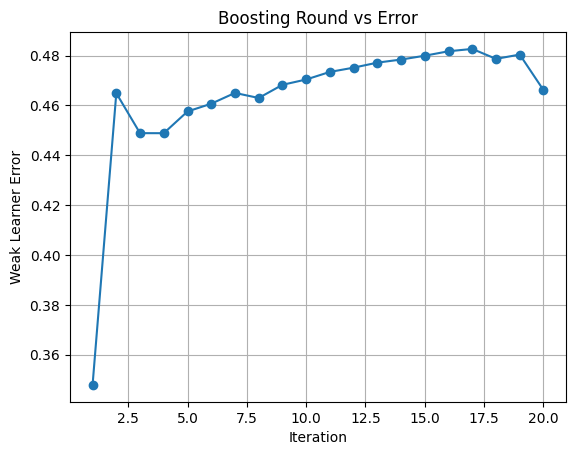

In [95]:
plt.plot(range(1, T+1), errors, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Weak Learner Error")
plt.title("Boosting Round vs Error")
plt.grid(True)
plt.show()

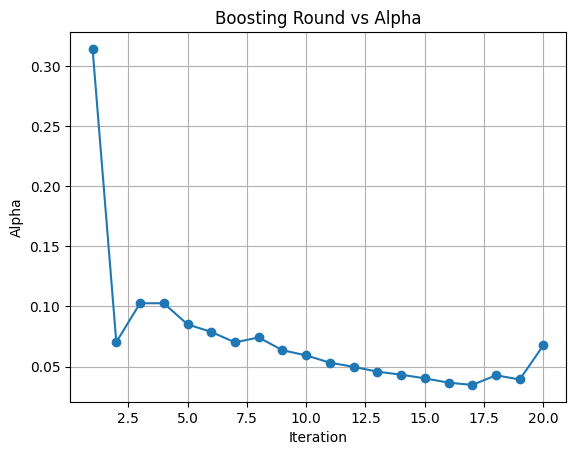

In [96]:
plt.plot(range(1, T+1), alphas, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Alpha")
plt.title("Boosting Round vs Alpha")
plt.grid(True)
plt.show()

In [ ]:
#3) part D

In [98]:
ada_skl = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada_skl.fit(X_train_scaled, y_train)
train_pred_skl = ada_skl.predict(X_train_scaled)
test_pred_skl  = ada_skl.predict(X_test_scaled)
print("Train Accuracy:", accuracy_score(y_train, train_pred_skl))
print("Test Accuracy:", accuracy_score(y_test, test_pred_skl))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred_skl))

Train Accuracy: 0.6976115183590283
Test Accuracy: 0.6969166104190956
Confusion Matrix:
 [[164210  23936]
 [ 74851  62943]]
